### Connecting to Twitter API

### One way

In [2]:
import tweepy
consumerKey = 'CHfvQADS2lWqWN3is8PEzHfut'
consumerSecret = 'I7x5E2xWp79UoXPJ6kD9PRDrGJRAJ4BaPnD0HRf6nVyz3XDzEN'
accessToken = '1002779913588359170-A6G6gLvVB14PPudT9Hx2uiflUBNLjb'
accessTokenSecret = 'byZoa2mGNLSIJUkD0qDur4JGdBnjvx9PEHEEJMydLjVpn'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

### another way

In [5]:
import oauth2 as oauth
import json


In [9]:
with open('config.json') as file:
    tokens = json.loads(file.read())

consumer = oauth.Consumer(key= tokens['CONSUMER_KEY'],secret=['COSUMER_SECRET'])

token = oauth.Token(key=tokens['ACCESS_TOKEN'], secret=tokens['ACCESS_SECRET'])

client = oauth.Client(consumer,token)

client  

### Getting twitter Data

###### we have to get
https://api.twitter.com/1.1/followers/list.json?screen_name=[screen_name]


In [28]:
import json

FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'

screen_name = 'donwan2011' # twitter handle

url = FOLLOWERS_URL + '?screen_name='+screen_name

#request = api.request(url,method='GET')

resp, content = client.request(url, "POST")

AttributeError: 'list' object has no attribute 'encode'

### Retweets Data

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

In [39]:
edgelist_txt = 'Datasets/retweets.txt'

G = nx.read_edgelist(edgelist_txt,create_using=nx.DiGraph())

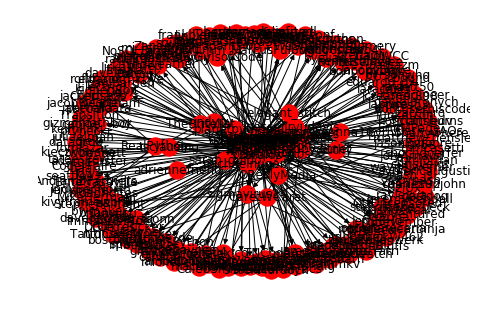

In [40]:
nx.draw(G,with_labels= True)

In [41]:
LAYOUTS = {
    'circular': nx.circular_layout,
    'fr':nx.fruchterman_reingold_layout,
    'random': nx.random_layout,
    'shell': nx.shell_layout,
    'spectral': nx.spectral_layout,
    'spring': nx.spring_layout 
}

In [45]:
def save_layout(G, layout_name):
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge=[n for n in G.nodes() if n in ['PyTennessee']]
    pos=LAYOUTS[layout_name](G) # positions for all nodes

    print (nlarge)
    # nodes
    nx.draw_networkx_nodes(G,pos,nodelist=nlarge,node_size=1)

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.5,edge_color='#cccccc')

    # labelsM
    labels={}
    labels['PyTennessee']='PyTennessee'
    nx.draw_networkx_labels(G,pos,labels,font_size=6)
    #nx.draw_networkx_labels(G,pos,nodelist=nlarge,font_size=6,font_family='sans-serif')
    
    
    plt.axis('off')
    plt.figure(figsize=(20,10))
    plt.savefig(layout_name + '.png', dpi=500)
    

['PyTennessee']


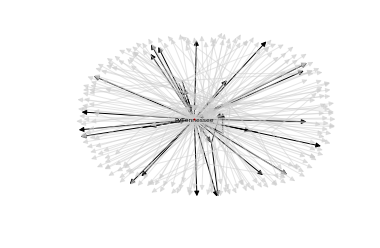

<Figure size 1440x720 with 0 Axes>

In [46]:
save_layout(G,'spring')

['PyTennessee']


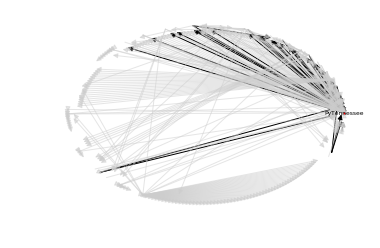

<Figure size 1440x720 with 0 Axes>

In [47]:
save_layout(G,'shell')

['PyTennessee']


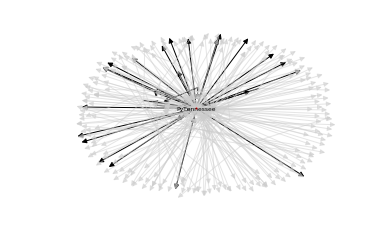

<Figure size 1440x720 with 0 Axes>

In [48]:
save_layout(G,'fr')

['PyTennessee']


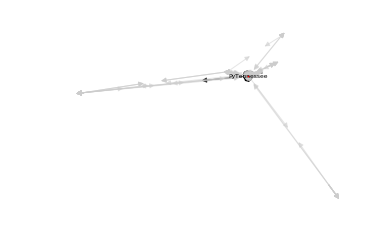

<Figure size 1440x720 with 0 Axes>

In [50]:
save_layout(G,'spectral')

['PyTennessee']


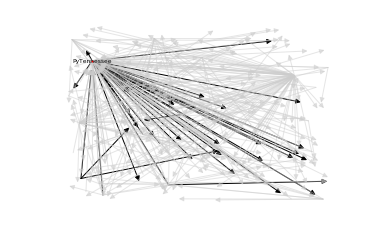

<Figure size 1440x720 with 0 Axes>

In [51]:
save_layout(G,'random')

['PyTennessee']


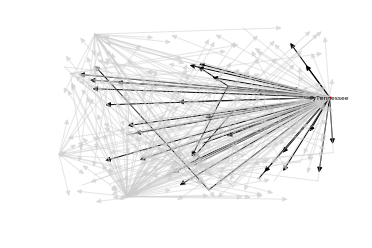

<Figure size 1440x720 with 0 Axes>

In [53]:
save_layout(G,'random')